In [1]:
#introduction to linear regression
#linear regression using gradient descent
#linear regression using OLS
#Linear Regression using Stochiastic gradient descent

# y = mx +c

#Where, y: dependent variable

#             x: independent variable

#           m: Slope of the line (For a unit increase in the quantity of X, Y increases by m.1 = m units.)

#           c: y intercept (The value of Y is c when the value of X is 0)

In [2]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt

# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\cerealspga05.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
print(df.head(2)) 


        name mfr type  calories  protein  fat  sodium  fiber  carbo  sugars  \
0  100%_Bran   N    C        70        4    1     130   10.0    5.0       6   
1   All-Bran   K    C        70        4    1     260    9.0    7.0       5   

   potass  vitamins  shelf  weight  cups     rating  
0     280        25      3     1.0  0.33  68.402973  
1     320        25      3     1.0  0.33  59.425505  


In [3]:
newdf = df.loc[:,['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']]
print(newdf.head())


   calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1        70        4    1     260    9.0    7.0       5     320        25   
2        50        4    0     140   14.0    8.0       0     330        25   
3       110        3    3     140    4.0   10.0       7     160        25   
4       120        3    1     200    6.0   11.0      14     260        25   

      rating  
0  68.402973  
1  59.425505  
2  93.704912  
3  40.448772  
4  37.840594  


In [4]:
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf


In [5]:
# ordinary least squares (OLS)
#In statistics, ordinary least squares (OLS) is a type of linear least squares method 
#for estimating the unknown parameters in a linear regression model.


In [6]:
results = smf.ols('rating ~ calories + sugars', data=newdf).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     83.88
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           2.00e-19
Time:                        18:55:55   Log-Likelihood:                -256.38
No. Observations:                  74   AIC:                             518.8
Df Residuals:                      71   BIC:                             525.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.8505      5.658     15.704      0.0

In [7]:
#pip install pandasql

In [8]:
df2 = newdf.corr()
#print(df2) Index
x = df2.loc['rating']
#x = df2.loc[df2.loc['rating'] > 0.6]
print(x)
#ndf = x.DataFrame(x)

calories   -0.712054
protein     0.504070
fat        -0.407215
sodium     -0.409548
fiber       0.600230
carbo       0.055804
sugars     -0.760031
potass      0.410556
vitamins   -0.243780
rating      1.000000
Name: rating, dtype: float64


In [9]:
import pandasql as ps
q1 = "select * FROM df where rating > 80"
print(ps.sqldf(q1))

                        name mfr type  calories  protein  fat  sodium  fiber  \
0  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    8.0       0     330        25      3     1.0   0.5  93.704912  


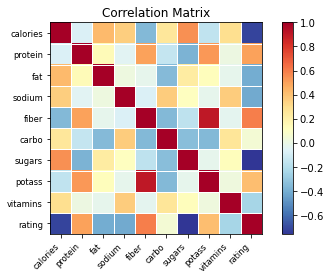

In [10]:
import statsmodels.graphics.api as smg
corr_matrix = np.corrcoef(newdf.T)
smg.plot_corr(corr_matrix, xnames=newdf.columns)
plt.show()

In [11]:
# Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\cerealspga05.csv')

x = np.array(df['calories']).reshape((-1, 1))
y = np.array(df['rating'])
reg = LinearRegression().fit(x, y)

reg

LinearRegression()

In [12]:
r_sq = reg.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5070207695168047


In [13]:
#When you’re applying .score(), the arguments are also the predictor x and regressor y, and the return value is 𝑅².


In [14]:
print('intercept:', reg.intercept_)

intercept: 101.07125096674471


In [15]:
print('slope:', reg.coef_)

slope: [-0.55137093]


In [16]:
y_pred = reg.predict(x)
y_pred

array([62.47528587, 62.47528587, 73.50270447, 40.42044868, 34.90673938,
       34.90673938, 34.90673938, 40.42044868, 40.42044868, 40.42044868,
       29.39303008, 51.44786728, 51.44786728, 34.90673938, 40.42044868,
       34.90673938, 40.42044868, 40.42044868, 40.42044868, 45.93415798,
       40.42044868, 40.42044868, 45.93415798, 40.42044868, 45.93415798,
       45.93415798, 40.42044868, 40.42044868, 45.93415798, 34.90673938,
       40.42044868, 45.93415798, 40.42044868, 45.93415798, 40.42044868,
       34.90673938, 34.90673938, 40.42044868, 40.42044868, 40.42044868,
       23.87932078, 40.42044868, 45.93415798, 40.42044868, 45.93415798,
       12.85190218, 45.93415798, 34.90673938, 23.87932078, 51.44786728,
       29.39303008, 45.93415798, 73.50270447, 73.50270447, 45.93415798,
       45.93415798, 45.93415798, 51.44786728, 40.42044868, 40.42044868,
       56.96157657, 51.44786728, 51.44786728, 40.42044868, 40.42044868,
       51.44786728, 40.42044868, 23.87932078, 45.93415798, 40.42

In [17]:
y_pred = reg.intercept_ + reg.coef_ * x

In [18]:
# pandas DF - ADD NEW COLUMN OF PREDICTION
# Original Rating, Predict Rating
df['pred_rating'] = y_pred
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,pred_rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,62.475286
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,62.475286
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,73.502704
3,Cracklin'_Oat_Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772,40.420449
4,Post_Nat._Raisin_Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594,34.906739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.00,0.75,39.106174,40.420449
70,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.00,1.00,27.753301,40.420449
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.00,0.67,49.787445,45.934158
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.00,1.00,51.592193,45.934158


In [19]:
x = np.array(df.loc[:,['calories','sugars']]).reshape((-1, 2))
y = np.array(df['rating'])
Mreg = LinearRegression().fit(x, y)

Mreg

LinearRegression()

In [20]:
r_sq = Mreg.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7026335448146463


In [21]:
r_sq = Mreg.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', Mreg.intercept_)

print('slope:', Mreg.coef_)

coefficient of determination: 0.7026335448146463
intercept: 88.85052181293153
slope: [-0.32719027 -1.68965472]


In [22]:
# Other Method

In [23]:
# X = feature values, all the columns except the last column
X = newdf.iloc[:, [0,1,4,6]]
# y = target values, last column of the data frame
y = newdf.iloc[:, -1]
X.head()

,calories,protein,fiber,sugars
0,70,4,10.0,6
1,70,4,9.0,5
2,50,4,14.0,0
3,110,3,4.0,7
4,120,3,6.0,14


In [24]:
split = int(0.8*len(newdf))
X_train, X_test, Y_train, Y_test = X[:split], X[split:], y[:split], y[split:]

#import numpy as np
#from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)

In [25]:
reg.score(X, y)

0.8576570757842814

In [26]:
newpred = reg.predict(X_test)
#type(newpred)
xyz = pd.DataFrame(newpred)

In [27]:
df_new = pd.concat([X_test, Y_test], axis=1)
# Original Rating, Predict Rating
df_new['pred_rating'] = newpred
df_new

,calories,protein,fiber,sugars,rating,pred_rating
59,110,2,0.0,3,40.560159,41.673169
60,80,2,3.0,0,68.235885,58.714363
61,90,3,4.0,0,74.472949,60.203765
62,90,3,3.0,0,72.801787,58.268430
63,110,2,1.0,15,31.230054,26.485806
64,110,6,1.0,3,53.131324,51.097456
65,90,2,3.0,5,59.363993,49.261734
66,110,2,0.0,3,38.839746,41.673169
67,140,3,4.0,14,28.592785,28.636429
68,100,3,3.0,3,46.658844,51.669584


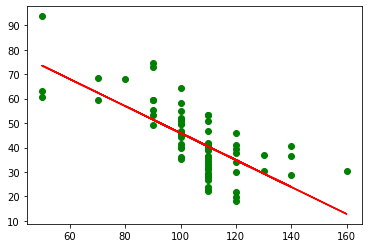

In [28]:
# any one variable in X for pLot
#SCATTER PLOT
# indentation
#for i in range(0,9):
X = newdf.iloc[:, [0]].values.reshape(-1, 1)  # values converts it into a numpy array
Y = newdf.iloc[:, 9].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y, color='green')
plt.plot(X, Y_pred, color='red')
plt.show()

In [29]:
# linear regression using gradient descent
# Loss Function
#The loss is the error in our predicted value of m and c. 
#Our goal is to minimize this error to obtain the most accurate value of m and c.
#We will use the Mean Squared Error function to calculate the loss. 

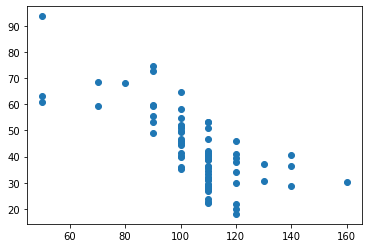

In [30]:
# Gradient descent is an iterative optimization algorithm to find the minimum of a function. 
X = newdf.iloc[:, 0]
Y =  newdf.iloc[:, 9]
plt.scatter(X, Y)
plt.show()

In [31]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

-7.367824961649988e+111 -6.776923752037206e+109


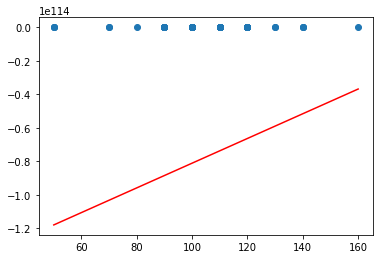

In [32]:
# Making predictions
m = -7.367824961649988e+111 
c = -6.776923752037206e+109
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [33]:
# Stochastic Gradient Descent

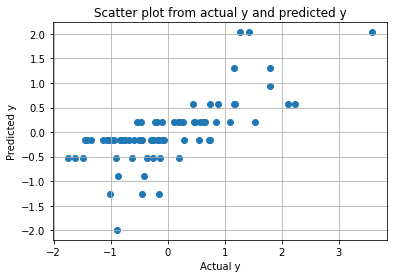

Mean Squared Error : 0.49470180008273373


In [54]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale

n_iter=1000
clf_ = SGDRegressor(max_iter=n_iter)

df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\cerealspga05.csv')

# X = feature values, all the columns except the last column
X = scale(df.iloc[:, [3]])
# y = target values, last column of the data frame
Y = scale(df.iloc[:, -1])

clf_.fit(X, Y)
y_pred_sksgd=clf_.predict(X)
plt.scatter(Y,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(Y, y_pred_sksgd))


R-squared: 0.7380610518424076
MSE:  71.4399093015549
RMSE:  8.452213278281311


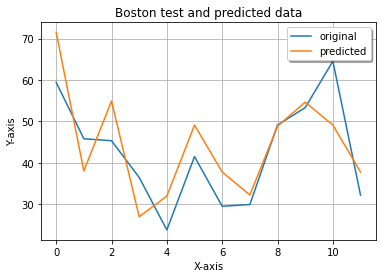

In [74]:
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\cerealspga05.csv')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
x = scale(df.iloc[:, [3,4]])
# y = target values, last column of the data frame
y = df.iloc[:, -1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.15)

sgdr = SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1,penalty='elasticnet')
sgdr.fit(xtrain, ytrain)

score = sgdr.score(xtrain, ytrain)
print("R-squared:", score)

# cv_score = cross_val_score(lsvr, x, y, cv=5)
# print("CV mean score: ", cv_score.mean())

ypred = sgdr.predict(xtest)


mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [94]:
xt = pd.DataFrame(xtest)
yt = pd.DataFrame(scale(ytest))

df_new = pd.concat([xt, yt], axis=1)
# Original Rating, Predict Rating
df_new['pred_rating'] = ypred
df_new['Y_rating'] = ytest
df_new

,0,1,0,pred_rating,Y_rating
0,-1.940286,1.387392,1.386561,71.515985,NaN
1,0.789394,0.462464,0.266039,38.050971,59.425505
2,-0.302478,1.387392,0.226231,54.921268,NaN
3,1.881266,0.462464,-0.502733,26.987827,NaN
4,0.243458,-1.387392,-1.545365,31.968239,NaN
5,-0.302478,0.462464,-0.088558,49.114116,NaN
6,0.243458,-0.462464,-1.075758,37.775391,NaN
7,0.789394,-0.462464,-1.041621,32.243819,NaN
8,-0.848414,-0.462464,0.538358,48.838536,29.509541
9,-0.848414,0.462464,0.883520,54.645688,NaN


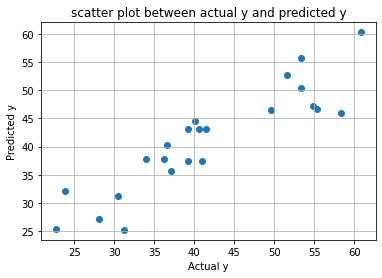

Mean Squared Error : 22.490140518577128
Mean Absolute Error : 3.7233885245095277


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error


df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\cerealspga05.csv')
df.axes
x = scale(df.iloc[:, [3,4,7,9]])
# y = target values, last column of the data frame
y = df.iloc[:, -1]

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# SkLearn SGD classifier
clf_ = SGDRegressor()
clf_.fit(x_train, y_train)
plt.scatter(y_test,clf_.predict(x_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, clf_.predict(x_test)))
print('Mean Absolute Error :',mean_absolute_error(y_test, clf_.predict(x_test)))

In [100]:
df.axes
# 3,4,7,9

[RangeIndex(start=0, stop=74, step=1),
 Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
        'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
        'rating'],
       dtype='object')]

In [119]:
clf_.predict(x_test)


array([37.77580718, 43.09545518, 32.12317533, 35.58131327, 37.86910087,
       37.49398661, 45.96552982, 25.44658962, 27.11573605, 55.76149335,
       37.49398661, 46.74018049, 46.46048917, 31.17722622, 47.20475169,
       43.09545518, 43.09545518, 25.19728645, 60.31245667, 52.64211553,
       44.54568657, 40.21960428, 50.44762161])

In [141]:
type(y_test)

pandas.core.series.Series

In [142]:
type(x_test)

numpy.ndarray

In [143]:
type(clf_.predict(x_test))

numpy.ndarray

In [167]:
# pandas.core.series.Series to DF
ydf = y_test.to_frame()
ydf = ydf.reset_index(level=0)
ydf


,index,rating
0,6,33.983679
1,59,40.560159
2,32,23.804043
3,10,37.038562
4,24,36.176196
5,29,41.015492
6,28,58.345141
7,17,22.736446
8,30,28.025765
9,12,53.313813


In [168]:
# numpy.ndarray AS DF
ypredx = pd.DataFrame(clf_.predict(x_test)).reset_index(level=0)
ypredx

,index,0
0,0,37.775807
1,1,43.095455
2,2,32.123175
3,3,35.581313
4,4,37.869101
5,5,37.493987
6,6,45.965530
7,7,25.446590
8,8,27.115736
9,9,55.761493


In [181]:
# RESET INDEX
ydf = y_test.to_frame()
#ydf = ydf.reset_index(level=0)
ydf.reset_index(drop=True, inplace=True)

# numpy.ndarray AS DF
ypredx = pd.DataFrame(clf_.predict(x_test))

ypredx.reset_index(drop=True, inplace=True)
dfnew = pd.concat([ydf, ypredx],axis=1)
dfnew

,rating,0
0,33.983679,37.775807
1,40.560159,43.095455
2,23.804043,32.123175
3,37.038562,35.581313
4,36.176196,37.869101
5,41.015492,37.493987
6,58.345141,45.965530
7,22.736446,25.446590
8,28.025765,27.115736
9,53.313813,55.761493
